**<h1><center>MNIST Handwritten Digit Classification</center></h1>**

In [1]:
# importing necessary libraries
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from prettytable import PrettyTable
%matplotlib notebook

Using TensorFlow backend.


In [3]:
# loading the mnist data set and then splitting it into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# shape & size of mnist dataset
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# reshaping train and test data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# converting the images from 3d to 2d
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# example of data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# normalizing the train and test data
X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# class label for first image
print("Class label of first image :", y_train[0])

# one hot encoding of all the labels by converting them into 10 dimensional vectors

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>Softmax Classifier</h2>

In [0]:
# intializing parameters for modelling
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 64 
nb_epoch = 20

In [0]:
# using sequential modelling & softmax as an activation function for the output layer
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [18]:
# compiling the base model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 1.0009 - acc: 0.7709 - val_loss: 0.6056 - val_acc: 0.8635
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5576 - acc: 0.8641 - val_loss: 0.4794 - val_acc: 0.8836
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.4762 - acc: 0.8785 - val_loss: 0.4287 - val_acc: 0.8906
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4365 - acc: 0.8848 - val_loss: 0.3998 - val_acc: 0.8967
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4118 - acc: 0.8894 - val_loss: 0.3804 - val_acc: 0.9009
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3947 - acc: 0.8937 - val_loss: 0.3671 - val_acc: 0.9028
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3817 - acc: 0.8959 - val_loss: 0.3564 - val_acc

In [0]:
# function to draw the plots for each model
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.3053771908044815
Test accuracy: 0.916


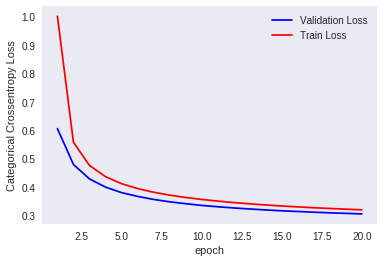

In [23]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the base model
%matplotlib inline
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL 1 :- MLP + ReLU + ADAM + 2 hidden layers</h2>

In [13]:
# using first model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# and 2 hidden layers
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
print(model_relu.summary())
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2476 - acc: 0.9255 - val_loss: 0.1212 - val_acc: 0.9624
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0960 

Test score: 0.11122736624673385
Test accuracy: 0.9777


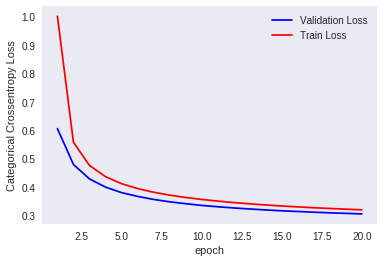

In [24]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the first model
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


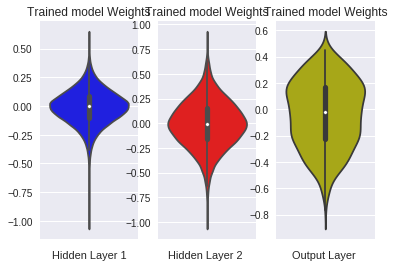

In [25]:
# violin plots for both the hidden layers and output layer in the first model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 2 :- MLP + ReLU + ADAM + 2 hidden layers + Batch Normalization</h2>

In [41]:
# using second model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 2 hidden layers
# and Batch Normalization
model_batch = Sequential()
model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.20

Test score: 0.08514962809118079
Test accuracy: 0.9814


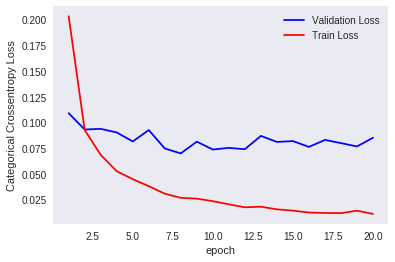

In [42]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the second model
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


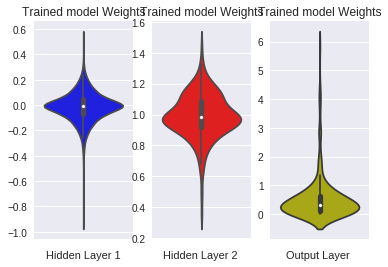

In [43]:
# violin plots for both the hidden layers and output layer in the second model
w_after = model_batch.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 3 :- MLP + ReLU + ADAM + 2 hidden layers + Dropout</h2>

In [44]:
# using third model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 2 hidden layers
# and Dropout layer
model_drop = Sequential()
model_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total para

Test score: 0.06593457361520268
Test accuracy: 0.9808


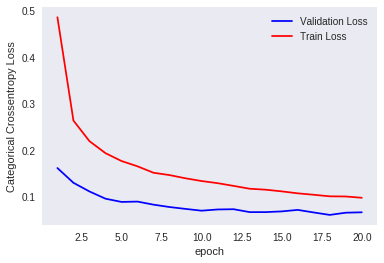

In [45]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the third model
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


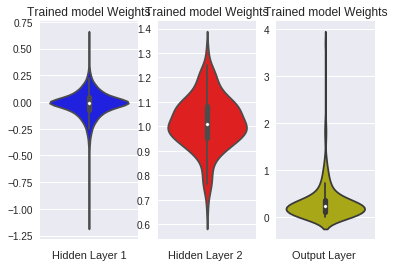

In [46]:
# violin plots for both the hidden layers and output layer in the third model
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 4 :- MLP + ReLU + ADAM + 3 hidden layers</h2>

In [34]:
# using fourth model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# and 3 hidden layers
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.353, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
print(model_relu.summary())
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 218,618
Trainable params: 218,618
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2951 - acc: 0.9109 - val_loss: 0.1389 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - l

Test score: 0.12125034286498171
Test accuracy: 0.9769


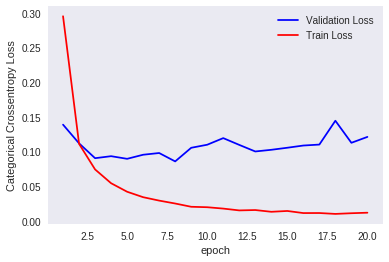

In [35]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the fourth model
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


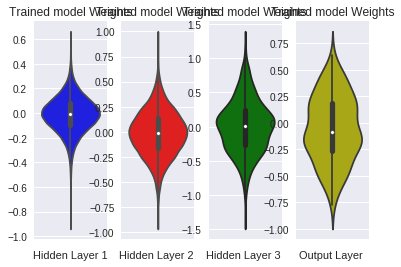

In [40]:
# violin plots for all the hidden layers and output layer in the fourth model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 5 :- MLP + ReLU + ADAM + 3 hidden layers + Batch Normalization</h2>

In [47]:
# using fifth model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 3 hidden layers
# and Batch Normalization
model_batch = Sequential()
model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.129, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                1040      
_________________________________________________________________
batch_normalization_15 (Batc (None, 16)                64        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                170       
Total para

Test score: 0.07852046162156912
Test accuracy: 0.9805


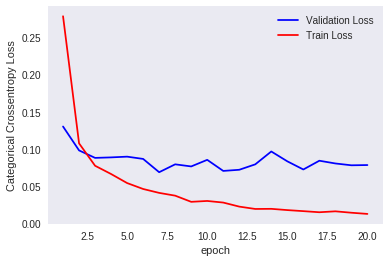

In [48]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the fifth model
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


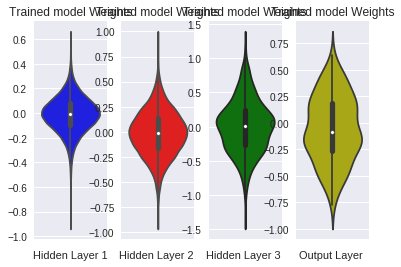

In [49]:
# violin plots for all the hidden layers and output layer in the fifth model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 6 :- MLP + ReLU + ADAM + 3 hidden layers + Dropout</h2>

In [50]:
# using sixth model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 3 hidden layers
# and Dropout Layer
model_drop = Sequential()
model_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.129, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                1040      
__________

Test score: 0.08381080346358358
Test accuracy: 0.9783


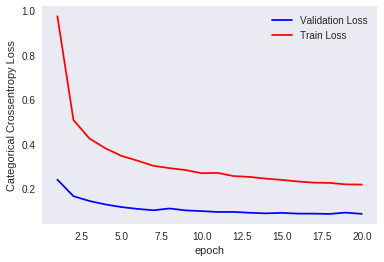

In [51]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the sixth model
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


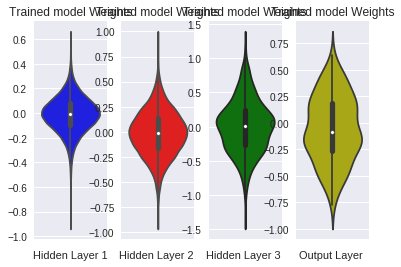

In [52]:
# violin plots for all the hidden layers and output layer in the sixth model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 7 :- MLP + ReLU + ADAM + 5 hidden layers</h2>

In [53]:
# using seventh model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# and 5 hidden layers
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.353, seed=None)) )
model_relu.add(Dense(8, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.500, seed=None)) )
model_relu.add(Dense(4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.707, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_37 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                50        
Total params: 218,670
Trainable params: 218,670
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.12606837807481644
Test accuracy: 0.979


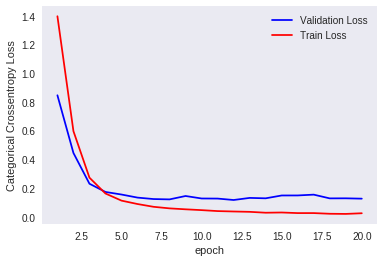

In [54]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the seventh model
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


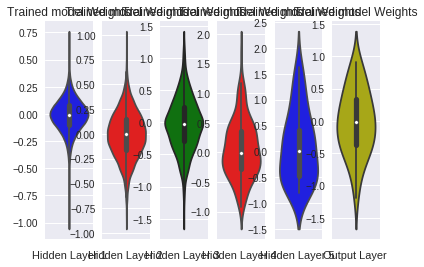

In [57]:
# violin plots for all the hidden layers and output layer in the seventh model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 8 :- MLP + ReLU + ADAM + 5 hidden layers + Batch Normalization</h2>

In [58]:
# using eight model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 5 hidden layers
# and Batch Normalization
model_batch = Sequential()
model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.129, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(8, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.226, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.324, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_43 (Dense)             (None, 16)                1040      
_________________________________________________________________
batch_normalization_21 (Batc (None, 16)                64        
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 136       
__________

Test score: 0.09901406904123723
Test accuracy: 0.9782


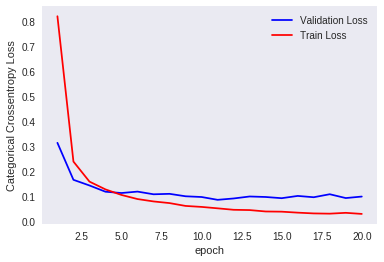

In [59]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the eight model
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


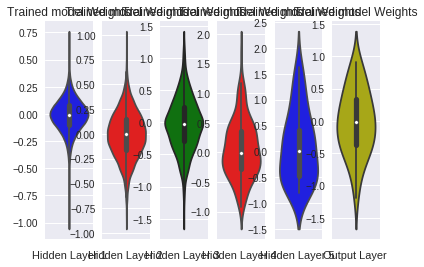

In [60]:
# violin plots for all the hidden layers and output layer in the eight model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MODEL 9 :- MLP + ReLU + ADAM + 5 hidden layers + Dropout</h2>

In [61]:
# using ninth model of multi layer perceptron with
# RelU as an activation function
# ADAM as an optimizer
# 5 hidden layers
# and Dropout layer
model_drop = Sequential()
model_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.035, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.129, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(8, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.226, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.324, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_25 (Batc (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 16)                1040      
__________

Test score: 0.8443415806770325
Test accuracy: 0.7809


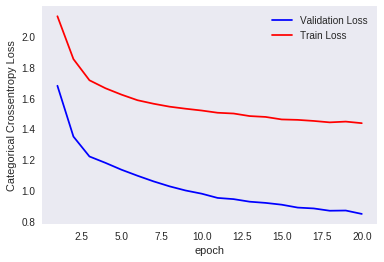

In [62]:
# evaluating the test accuracy and plotting a graph for comparing validation & train loss for the ninth model
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


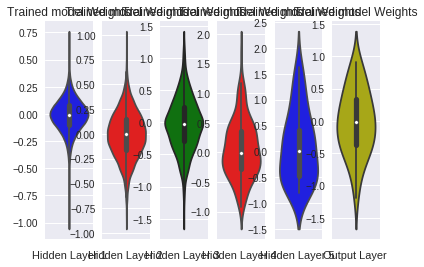

In [70]:
# violin plots for all the hidden layers and output layer in the ninth model
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>Conclusion :-</h2>

In [67]:
x = PrettyTable()
x.field_names = ["Model", "Number of Layers", "Train log loss","Train Accuracy","Test log loss","Test Accuracy"]
x.add_row(["MLP + ReLU + ADAM","2","0.0074","99.74","0.1112","97.77"])
x.add_row(["MLP + ReLU + ADAM + Batch Normalization","2","0.0111","99.62","0.0851","98.14"])
x.add_row(["MLP + ReLU + ADAM + Dropout","2","0.0972","97.07","0.0659","98.08"])
x.add_row(["MLP + ReLU + ADAM","3","0.0121","99.62","0.1213","97.69"])
x.add_row(["MLP + ReLU + ADAM + Batch Normalization","3","0.0165","99.44","0.0807","97.97"])
x.add_row(["MLP + ReLU + ADAM + Dropout","3","0.2232","93.76","0.0836","97.88"])
x.add_row(["MLP + ReLU + ADAM","5","0.0245","99.40","0.1261","97.90"])
x.add_row(["MLP + ReLU + ADAM + Batch Normalization","5","0.0295","99.16","0.0990","97.82"])
x.add_row(["MLP + ReLU + ADAM + Dropout","5","1.4353","42.41","0.8443","78.09"])
print (x)

+-----------------------------------------+------------------+----------------+----------------+---------------+---------------+
|                  Model                  | Number of Layers | Train log loss | Train Accuracy | Test log loss | Test Accuracy |
+-----------------------------------------+------------------+----------------+----------------+---------------+---------------+
|            MLP + ReLU + ADAM            |        2         |     0.0074     |     99.74      |     0.1112    |     97.77     |
| MLP + ReLU + ADAM + Batch Normalization |        2         |     0.0111     |     99.62      |     0.0851    |     98.14     |
|       MLP + ReLU + ADAM + Dropout       |        2         |     0.0972     |     97.07      |     0.0659    |     98.08     |
|            MLP + ReLU + ADAM            |        3         |     0.0121     |     99.62      |     0.1213    |     97.69     |
| MLP + ReLU + ADAM + Batch Normalization |        3         |     0.0165     |     99.44      | 

<h2>Steps Followed :-</h2>

- Load the MNIST dataset.
- Train and test split of the MNIST dataset.
- Normalize the train and test data.
- Converting class variable into categorical data vector.
- Implement Softmax Classifier.
- Trying out different MLP architectures with different activation functions, optimizers and different number of layers on MNIST dataset.
- Draw categorical crossentropy loss vs number of epochs plot.
- Draw violin plots for hidden layers and output layer.
- At the end in the conclusion section compare training and test log loss for each model. 